# Statistics on the Online News Popularity Dataset

- 60 features of a aset of 40K news articles publish by Mashable over a period of 2 years

## Goal
use these features to predict the popularity of the articles in terms of the number of shares on social media.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
data = 'data/OnlineNewsPopularity/OnlineNewsPopularity.csv'

In [3]:
df = pd.read_csv(data,delimiter=', ')

/home/salas/miniconda3/envs/supervised/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [5]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
# normalize columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### Take the log  of `n_tokens_content` feature, which represents the number of words (Tokens_ in  a news article)

In [7]:
df['log_n_tokens_content'] = np.log10(df.n_tokens_content + 1)

In [8]:
df[['n_tokens_content','log_n_tokens_content']].head()

,n_tokens_content,log_n_tokens_content
0,219.0,2.342423
1,255.0,2.408240
2,211.0,2.326336
3,531.0,2.725912
4,1072.0,3.030600


## Train two liner regression models to predict the num of shares of an article,
1. using original features
2. using log transformed version


## Train models

In [9]:
# original model
X = df[['n_tokens_content']]
y = df[['shares']]
model_original = linear_model.LinearRegression()
score_original = cross_val_score(model_original,X,y, cv=10)

In [10]:
# log model
X = df[['log_n_tokens_content']]
y = df[['shares']]
model_log = linear_model.LinearRegression()
score_log = cross_val_score(model_log,X,y, cv=10)

In [11]:
print('R-squared score w/out log transform:\t{:0.5f} (+/-{:0.5f})'.format(score_original.mean(),score_original.std()*2))
print('R-squared score w/log transform:\t{:0.5f} (+/-{:0.5f})'.format(score_log.mean(),score_log.std()*2))

R-squared score w/out log transform:	-0.00242 (+/-0.00509)
R-squared score w/log transform:	-0.00114 (+/-0.00418)


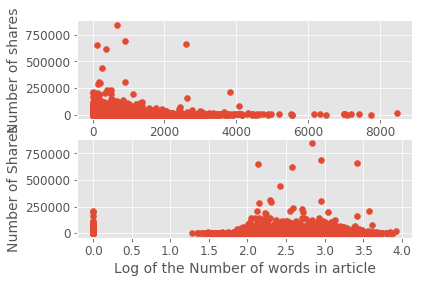

In [12]:
# visualize
fig,(ax1,ax2) = plt.subplots(2,1)
ax1.scatter(df.n_tokens_content,df.shares)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Numer of words in Article',fontsize=14)
ax1.set_ylabel('Number of shares', fontsize=14)

ax2.scatter(df.log_n_tokens_content, df.shares)
ax2.tick_params(labelsize=12)
ax2.set_xlabel('Log of the Number of words in article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)
plt.show()

## Visualize

In [ ]:
fig, (ax1,ax2) = plt.subplot(2,1)
df.n_tokens_content.hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('number of words in article',fontsize=14)
ax1.set_ylabel('nubmer of articles',fontsize=14)

df.log_n_token